In [1]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
tf.enable_v2_behavior()

In [2]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [3]:
my_model = tf.keras.models.load_model("my_model")

In [4]:
(ds_test, ds_train) = tfds.load(
    'mnist',
    split=['test', 'train'], 
    as_supervised=True,
    shuffle_files=True
)

print(type(ds_test))

for image, label in tfds.as_numpy(ds_test.take(1)):
    print(type(image), type(label), label)
    
for image, label in tfds.as_numpy(ds_train.take(1)):
    print(type(image), type(label), label)  

<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
<class 'numpy.ndarray'> <class 'numpy.int64'> 7
<class 'numpy.ndarray'> <class 'numpy.int64'> 4


In [81]:
# ds_mnist = tfds.load(
#     'mnist',
#     as_supervised=True,
#     shuffle_files=True
# )

# ds_test = ds_mnist['test']
# ds_train = ds_mnist['train']
# print(type(ds_test))


# for image, label in tfds.as_numpy(ds_test.take(1)):
#     print(type(image), type(label), label)
    
# for image, label in tfds.as_numpy(ds_train.take(1)):
#     print(type(image), type(label), label)    

<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
<class 'numpy.ndarray'> <class 'numpy.int64'> 2
<class 'numpy.ndarray'> <class 'numpy.int64'> 0


In [5]:
# normalize_img
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)


(28, 28, 1)


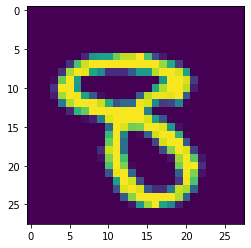

(28, 28, 1)


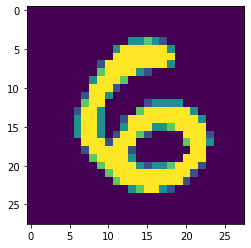

(28, 28, 1)


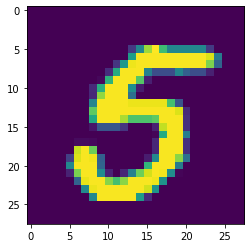

(28, 28, 1)


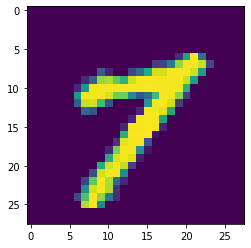

In [6]:
from matplotlib import pyplot as plt

# A few random samples
use_samples = [159, 1336, 1283, 2122]
samples_to_predict = []

for sample in use_samples:
    # Generate a plot
    reshaped_image = list(ds_test)[sample]
#     print(reshaped_image[0])
    print(reshaped_image[0].shape)
    img = tf.keras.preprocessing.image.array_to_img(reshaped_image[0])    
    plt.imshow(img)
    plt.show()
    samples_to_predict.append(reshaped_image[0])



In [ ]:
# print(samples_to_predict[0])

In [8]:
import numpy as np

for sample in samples_to_predict:
    print(sample.shape)

samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(4, 28, 28, 1)


In [9]:
predictions = my_model.predict(samples_to_predict)
print(predictions)

classes = np.argmax(predictions, axis = 1)
print(classes)

[[5.86640638e-08 2.34280338e-11 2.79293617e-05 6.00093008e-05
  2.77800556e-08 7.15957794e-05 5.06273636e-08 1.90981790e-08
  9.93757010e-01 6.08329987e-03]
 [2.91260658e-03 6.28612229e-09 1.64546509e-05 3.86447464e-05
  1.93247951e-09 2.45400723e-02 9.67257798e-01 1.08699636e-08
  5.14567224e-03 8.87107890e-05]
 [5.11939184e-08 8.23022817e-10 1.21604038e-09 7.46782644e-06
  7.90911520e-12 9.99977350e-01 2.64918532e-09 3.08080845e-13
  1.93362985e-06 1.31951865e-05]
 [1.32424574e-07 1.03601266e-03 1.62898461e-04 4.89898093e-06
  2.98473373e-04 8.07496690e-06 6.54097221e-10 9.98213530e-01
  2.23350391e-04 5.27160955e-05]]
[8 6 5 7]
